# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Data

In [124]:
N = 100 # number of samples
D = 2 # number of features/dimensions

N_0 = int(N/2) # number of samples for class 0
N_1 = int(N/2) # number of samples for class 1

mu_0 = [-2,-2]
variance = 1

mu_1 = [2,2]

m_cov = [[variance, 0],
         [0, variance]]

In [125]:
np.random.seed(41) # make the results reproducible
X = np.concatenate([np.random.multivariate_normal(mu_0, m_cov, N_0),
                    np.random.multivariate_normal(mu_1, m_cov, N_1)],
                   axis=0)
X.shape

(100, 2)

The labels:

In [126]:
T = np.array([0]*N_0 + [1]*N_1)

Scatter plot:

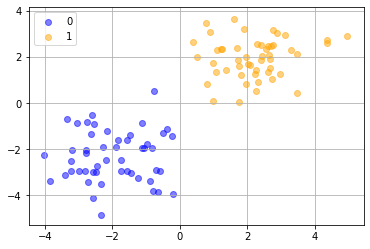

In [127]:
colors = ['blue', 'orange']
for i, color in enumerate(colors):
    i_samples = X[T == i]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=color, alpha=0.5, label=str(i))

plt.legend()
plt.grid(True)
plt.show()

## The Algorithm

$k$: The number of clusters
1. Randomly assign positions for the initial $k$-means
2. Assign each data sample to the mean to which it is closest
3. If no sample's assignment has changed, stop and keep the clusters. Others repeat from step 2

In [128]:
K=2

1. The Initial $k$-means

array([[-0.63214899, -3.85873942],
       [ 1.96203785,  2.01285565]])

In [130]:
def squared_distance(x, y):
    return np.sum((y-x)**2)

In [131]:
def vector_mean(vecs):
    np.mean(vecs, axis=1)

In [132]:
def assign_label(sample):
    return min(range(K), key=lambda i: squared_distance(sample, means[i]))

In [135]:
means = X[np.random.randint(len(X), size=K),:]
means

array([[-2.56831065, -4.11161836],
       [ 2.31066401,  0.91879078]])

In [133]:
max_n_iter = 100
assignments = None

n_iter = 0
while True:
    new_assignments = np.apply_along_axis(func1d=assign_label, axis=1, arr=X)

    if np.array_equal(assignments, new_assignments):
        break

    assignments = new_assignments

    for i in range(K):
        # find all the points assigned to cluster i

        i_samples = X[assignments == i]

        if len(i_samples) > 0:
            means[i] = np.mean(i_samples, axis=0)
    n_iter += 1
    if n_iter >= max_n_iter:
        break

In [134]:
assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

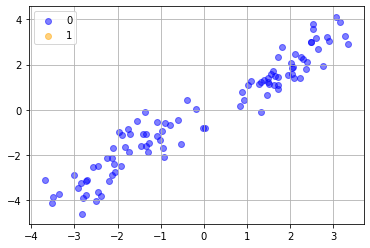

In [123]:
colors = ['blue', 'orange']
for k in range(K):
    i_samples = X[assignments == k]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=colors[k], alpha=0.5, label=str(k))
plt.legend()
plt.grid(True)
plt.show()

/Users/randomwalker/Projects/fromscratch/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
/Users/randomwalker/Projects/fromscratch/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


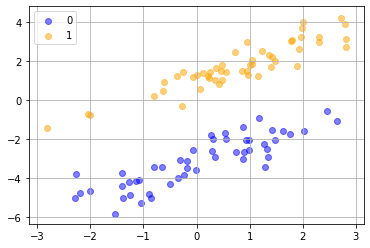

In [177]:
mu_0 = [0,-3]
variance = 1

mu_1 = [1,2]

m_cov = [[1, 0.8],
         [1.8, 2]]

np.random.seed(41) # make the results reproducible
X = np.concatenate([np.random.multivariate_normal(mu_0, m_cov, N_0),
                    np.random.multivariate_normal(mu_1, m_cov, N_1)],
                   axis=0)
X.shape

T = np.array([0]*N_0 + [1]*N_1)

colors = ['blue', 'orange']
for i, color in enumerate(colors):
    i_samples = X[T == i]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=color, alpha=0.5, label=str(i))

plt.legend()
plt.grid(True)
plt.show()

In [178]:
K=2

In [179]:
means = X[np.random.randint(len(X), size=K),:]
means

array([[-1.04653909, -5.26267029],
       [ 1.04119548,  2.05118521]])

In [180]:
max_n_iter = 100
assignments = None

n_iter = 0
while True:
    new_assignments = np.apply_along_axis(func1d=assign_label, axis=1, arr=X)

    if np.array_equal(assignments, new_assignments):
        break

    assignments = new_assignments

    for i in range(K):
        # find all the points assigned to cluster i

        i_samples = X[assignments == i]

        if len(i_samples) > 0:
            means[i] = np.mean(i_samples, axis=0)
    n_iter += 1
    if n_iter >= max_n_iter:
        break

In [181]:
assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [182]:
means

array([[-0.17404107, -3.09142819],
       [ 1.03787617,  1.80280825]])

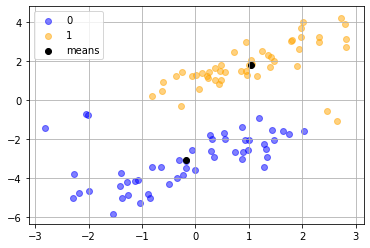

In [183]:
colors = ['blue', 'orange']
for k in range(K):
    i_samples = X[assignments == k]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=colors[k], alpha=0.5, label=str(k))
plt.scatter(means[:,0], means[:,1], c='black', label='means')
plt.legend()
plt.grid(True)
plt.show()